In [204]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydotplus as pp
import seaborn as sns

from IPython.display import display
from IPython.display import Image

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [205]:
class CONFIG:
    INDEXS = ["R2 Pred", "R2", "EV", "ME", "MEAN_AE", "MSE", "MEDIAN_AE"]

# Load Dataset

In [206]:
header = pd.read_csv("Dataset/header.csv", header=None)
header

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable


In [207]:
training_dataset = pd.read_csv("Dataset/Training/Features_Variant_1.csv",
                               header=None,
                               names=[header.iat[0, i] for i in range(0, 54)])
training_dataset.sample(n=10)

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
14698,192885,1,2647,24,0.0,67.0,16.791045,13.0,12.508549,0.0,...,0,0,0,0,0,0,1,0,0,0
40635,1009493,175714,47503,9,0.0,374.0,54.284211,24.0,73.187238,0.0,...,0,0,0,0,0,0,0,0,1,5
23529,12293,3744,3015,32,0.0,18.0,1.795699,0.0,3.620608,0.0,...,0,0,0,0,0,1,0,0,0,0
30995,27147,0,2260,28,0.0,26.0,4.504673,3.0,5.096038,0.0,...,0,1,0,0,1,0,0,0,0,0
1516,1977515,27412,92370,9,7.0,1339.0,262.815789,205.0,254.560442,0.0,...,0,0,0,0,0,0,0,0,1,0
15520,4526533,0,111134,9,0.0,752.0,65.810811,29.0,107.484339,0.0,...,0,0,0,0,0,0,1,0,0,1
9973,4233,0,1005,18,0.0,44.0,6.013953,4.0,7.095678,0.0,...,1,0,0,0,0,0,0,0,1,0
34240,2626792,2423,203562,18,48.0,442.0,232.047619,235.0,127.572006,3.0,...,0,1,1,0,0,0,0,0,0,33
32575,274207,0,100435,18,2.0,664.0,134.565854,74.0,136.996428,0.0,...,0,0,0,0,0,0,0,1,0,21
15050,96918,100,4495,8,0.0,158.0,14.578313,8.0,24.760599,0.0,...,0,0,0,0,0,0,0,0,1,0


In [208]:
training_dataset.corr()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
Page Popularity/likes,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862,0.058918
Page Checkinsâ€™s,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329,0.022982
Page talking about,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755,0.177330
Page Category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835,-0.073673
Derived5,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,-0.006791,-0.006288,0.000411,-0.005560,0.003863,0.004396,0.006181,-0.000473,-0.009087,0.156940
Derived6,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,-0.010858,-0.007634,-0.009277,-0.002204,0.003126,0.010823,0.005458,-0.001994,-0.006246,0.231432
Derived7,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,-0.017237,-0.004111,-0.007631,-0.006261,0.007653,0.005512,0.013246,-0.001624,-0.011320,0.334986
Derived8,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,-0.015482,-0.002106,-0.005210,-0.007170,0.008770,0.001387,0.012772,-0.001196,-0.009712,0.325367
Derived9,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,-0.016389,-0.009239,-0.011792,-0.006018,0.004579,0.012609,0.013428,-0.003172,-0.010236,0.300229
Derived10,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,-0.004967,-0.004455,-0.003601,-0.005171,-0.000542,0.011366,0.001631,0.001868,-0.005928,0.103345


In [209]:
features = training_dataset.iloc[:, :53]
features

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,0,1
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,0,1
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,1,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40945,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0
40946,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,1,0,0
40947,7170111,70,497000,9,0.0,1881.0,497.200000,269.0,502.318385,0.0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
labels = training_dataset.iloc[:, -1:]
labels

,Target Variable
0,0
1,0
2,0
3,0
4,0
...,...
40944,1
40945,2
40946,72
40947,28


In [211]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

In [212]:
features.corr()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Thursday,Post published weekday-Friday,Post published weekday-Saturday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday
Page Popularity/likes,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,-0.003134,-0.009503,0.003397,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862
Page Checkinsâ€™s,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,0.003990,-0.005844,0.007936,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329
Page talking about,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,-0.016917,-0.027627,-0.007700,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755
Page Category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,0.009626,0.002942,-0.002263,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835
Derived5,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,0.002622,-0.006791,-0.006288,0.000411,-0.005560,0.003863,0.004396,0.006181,-0.000473,-0.009087
Derived6,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,0.000519,-0.010858,-0.007634,-0.009277,-0.002204,0.003126,0.010823,0.005458,-0.001994,-0.006246
Derived7,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,-0.002751,-0.017237,-0.004111,-0.007631,-0.006261,0.007653,0.005512,0.013246,-0.001624,-0.011320
Derived8,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,-0.002615,-0.015482,-0.002106,-0.005210,-0.007170,0.008770,0.001387,0.012772,-0.001196,-0.009712
Derived9,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,-0.004325,-0.016389,-0.009239,-0.011792,-0.006018,0.004579,0.012609,0.013428,-0.003172,-0.010236
Derived10,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,-0.000577,-0.004967,-0.004455,-0.003601,-0.005171,-0.000542,0.011366,0.001631,0.001868,-0.005928


# Decision Tree

## Model Training

In [213]:
def train_model(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    return predict

In [214]:
def plot_test_predict(y_train, y_test, predict, axes=None, k=None):
    test_predict = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(predict.transpose())], axis=1)
    headers = ["Test", "Predict"]
    test_predict.columns = headers
    if axes is not None and k is not None:
        sns.lineplot(data=test_predict.sample(n=50), ax=axes[k]).set_title("Test Predict Curve k = " + str(k))
    else:
        sns.lineplot(data=test_predict.sample(n=50)).set_title("Test Predict Curve")
    plt.show()
    sns.residplot(x=y_test.to_numpy(), y=predict, lowess=True).set_title("Residuals")
    plt.show()

## Model Evaluation

In [215]:
def evaluate(model, X_test, y_test, predict):

    # R-Squared Prediction
    r2_pred = model.score(X_test, y_test)
    
    # R-Squared
    r2 = r2_score(y_test, predict)
    
    # Explained Variance Score
    ev = explained_variance_score(y_test, predict)
    
    # Max Error
    me = max_error(y_test, predict)
    
    # Mean Absolute Error
    mean_ae = mean_absolute_error(y_test, predict)
    
    # Mean Squared Error
    mse = mean_squared_error(y_test, predict)
    
    # Median Absolute Error
    median_ae = median_absolute_error(y_test, predict)
    
    return r2_pred, r2, ev, me, mean_ae, mse, median_ae

## Draw Tree

In [67]:
def draw_tree(model, X_train, y_train):
    dot_data = tree.export_graphviz(model, out_file=None,
                                    feature_names=X_train.columns,
                                    class_names=y_train.columns,  
                                    filled=True,
                                    rounded=True,
                                    special_characters=True)
    graph = pp.graph_from_dot_data(dot_data)
    img = Image(graph.create_png())
    display(img)

## Final Model

In [216]:
def train_final_model(max_depth=None, min_samples_split=2):
    # DecisionTreeRegressor
    model = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)

    # Model Training
    predict = train_model(model)
    plot_test_predict(y_train, y_test, predict)

    # Model Evaluation
    r2_pred, r2, ev, me, mean_ae, mse, median_ae = evaluate(model, X_test, y_test, predict)

    results = pd.DataFrame({
        "Index": CONFIG.INDEXS, 
        "Mean": [r2_pred, r2, ev, me, mean_ae, mse, median_ae]
    })
    print(results)

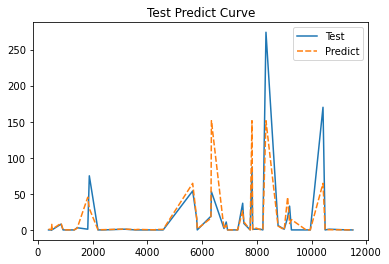

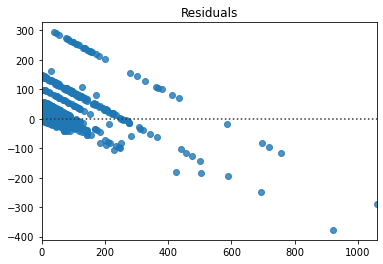

       Index        Mean
0    R2 Pred    0.483877
1         R2    0.483877
2         EV    0.484041
3         ME  768.611702
4    MEAN_AE    4.982692
5        MSE  524.116312
6  MEDIAN_AE    0.557078


In [217]:
train_final_model(max_depth=10, min_samples_split=.015)

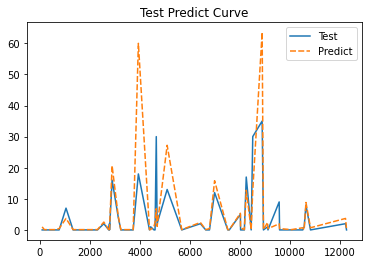

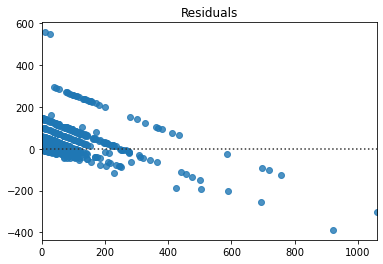

       Index        Mean
0    R2 Pred    0.447724
1         R2    0.447724
2         EV    0.447932
3         ME  768.611702
4    MEAN_AE    4.907189
5        MSE  560.829133
6  MEDIAN_AE    0.532129


In [218]:
train_final_model(max_depth=10, min_samples_split=0.01)

#### Not that great of a model. Let's try some feature engineering.

In [219]:
df = training_dataset

In [220]:
df.insert(46, "posted on weekday", (df["Post published weekday-Monday"] | df["Post published weekday-Tuesday"] | df["Post published weekday-Wednesday"] | df["Post published weekday-Thursday"] | df["Post published weekday-Friday"]).astype("int"))

In [221]:
df.head()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,Post published weekday-Saturday,posted on weekday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,1,0,0,0,1,0,0,0,0


In [222]:
df.insert(46, "posted on weekend", (df["Post published weekday-Sunday"] | df["Post published weekday-Saturday"]).astype("int"))

In [223]:
df.drop(["Post published weekday-Saturday", "Post published weekday-Sunday", "Post published weekday-Monday", "Post published weekday-Tuesday", "Post published weekday-Wednesday", "Post published weekday-Thursday", "Post published weekday-Friday"], axis = 1, inplace = True)

In [224]:
df.corr()

,Page Popularity/likes,Page Checkinsâ€™s,Page talking about,Page Category,Derived5,Derived6,Derived7,Derived8,Derived9,Derived10,...,posted on weekend,posted on weekday,Base DateTime weekday-Sunday,Base DateTime weekday-Monday,Base DateTime weekday-Tuesday,Base DateTime weekday-Wednesday,Base DateTime weekday-Thursday,Base DateTime weekday-Friday,Base DateTime weekday-Saturday,Target Variable
Page Popularity/likes,1.000000,0.044839,0.623436,-0.042167,0.059575,0.158714,0.166425,0.145216,0.174597,0.015750,...,-0.000369,0.000369,-0.003665,0.006125,-0.000433,0.003840,0.006070,-0.003045,-0.008862,0.058918
Page Checkinsâ€™s,0.044839,1.000000,0.166850,-0.060181,-0.002830,0.169236,0.154968,0.121734,0.178410,-0.003997,...,0.002310,-0.002310,-0.000324,0.008330,0.002385,-0.006826,0.000313,0.000873,-0.004329,0.022982
Page talking about,0.623436,0.166850,1.000000,-0.148685,0.181432,0.482016,0.518604,0.455487,0.541041,0.059709,...,-0.000151,0.000151,-0.016521,-0.001683,0.006739,0.020424,0.024486,-0.011423,-0.022755,0.177330
Page Category,-0.042167,-0.060181,-0.148685,1.000000,-0.041646,-0.313601,-0.229936,-0.188769,-0.288469,-0.011617,...,-0.007184,0.007184,0.008858,-0.004926,-0.008104,-0.003160,-0.002917,0.011931,-0.001835,-0.073673
Derived5,0.059575,-0.002830,0.181432,-0.041646,1.000000,0.127576,0.474400,0.551731,0.202030,0.610646,...,-0.007538,0.007538,0.000411,-0.005560,0.003863,0.004396,0.006181,-0.000473,-0.009087,0.156940
Derived6,0.158714,0.169236,0.482016,-0.313601,0.127576,1.000000,0.706975,0.574617,0.895083,0.045730,...,0.002822,-0.002822,-0.009277,-0.002204,0.003126,0.010823,0.005458,-0.001994,-0.006246,0.231432
Derived7,0.166425,0.154968,0.518604,-0.229936,0.474400,0.706975,1.000000,0.963965,0.894524,0.222304,...,0.000413,-0.000413,-0.007631,-0.006261,0.007653,0.005512,0.013246,-0.001624,-0.011320,0.334986
Derived8,0.145216,0.121734,0.455487,-0.188769,0.551731,0.574617,0.963965,1.000000,0.765472,0.266495,...,0.000422,-0.000422,-0.005210,-0.007170,0.008770,0.001387,0.012772,-0.001196,-0.009712,0.325367
Derived9,0.174597,0.178410,0.541041,-0.288469,0.202030,0.895083,0.894524,0.765472,1.000000,0.062964,...,-0.000965,0.000965,-0.011792,-0.006018,0.004579,0.012609,0.013428,-0.003172,-0.010236,0.300229
Derived10,0.015750,-0.003997,0.059709,-0.011617,0.610646,0.045730,0.222304,0.266495,0.062964,1.000000,...,-0.006535,0.006535,-0.003601,-0.005171,-0.000542,0.011366,0.001631,0.001868,-0.005928,0.103345


In [227]:
features = df.iloc[:, :49]
labels = df.iloc[:, -1:]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.3, random_state=42)

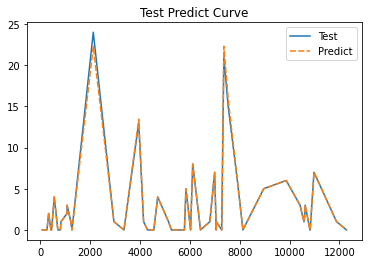

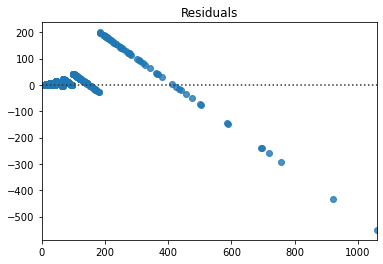

       Index        Mean
0    R2 Pred    0.817265
1         R2    0.817265
2         EV    0.817285
3         ME  700.809524
4    MEAN_AE    1.134249
5        MSE  185.564980
6  MEDIAN_AE    0.000000


In [229]:
train_final_model(max_depth=12, min_samples_split=.015)

#### TA said to try GridSearchCV with different parameters. Here goes:

In [233]:
from sklearn.model_selection import GridSearchCV

tree_para = {'max_depth' : [5,10,11,12,15,20], 'min_samples_split': [0.01,0.015,0.02]}
clf = GridSearchCV(DecisionTreeRegressor(), tree_para, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 11, 12, 15, 20],
                         'min_samples_split': [0.01, 0.015, 0.02]})

In [234]:
clf.best_params_

{'max_depth': 10, 'min_samples_split': 0.01}

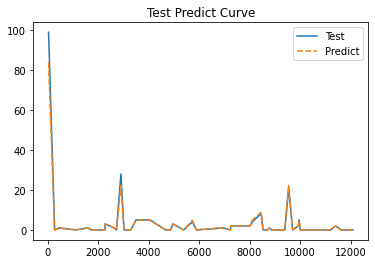

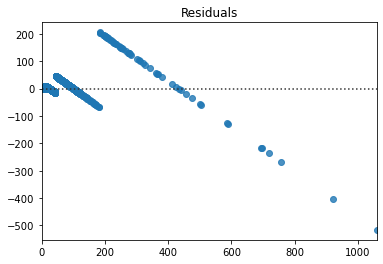

       Index        Mean
0    R2 Pred    0.784514
1         R2    0.784514
2         EV    0.784537
3         ME  700.809524
4    MEAN_AE    2.207600
5        MSE  218.822797
6  MEDIAN_AE    0.000000


In [235]:
train_final_model(max_depth=10, min_samples_split=.01)

#### GridSearchCV did not help as out model already has a better performance with R2 Pred = 0.817.

#### So, best decision tree regressor has params: max_depth = 12, min_samples_split = 0.015